# Genetic Algorithm Centroid Simulation

In [1]:
import random
import matplotlib.pyplot as plt
from deap import creator, base, tools
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
CXPB = 0.6   # the probability with which two individuals are crossed
MUTPB = 0.2  # the probability for mutating an individual

# Fitness and Individual objects
creator.create('FitnessMax', base.Fitness, weights = (1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

# Random binary string generator
def rbin():
    bin_list = []
    for i in range(100):
        bit = str(random.randint(0,1))
        bin_list.append(bit)
    bin_str = ''.join(bin_list)
    return bin_str

# Crossover function
def xover(ind):
    for i,j in zip(ind[::2], ind[1::2]):
        idx = random.randint(1, len(i)-1)
        c = i[:idx] + j[idx:]
        d = j[:idx] + i[idx:]
        ind[ind.index(i)] = c
        ind[ind.index(j)] = d
    return ind

# Mutation function
def mutation(ind):
    idx_ls = random.randint(0, len(ind) - 1)
    idx_str = random.randint(0,len(ind[0]) - 1)
    mutant = ind[idx_ls][:idx_str] + str(random.randint(0,1)) + ind[idx_ls][idx_str+1:]
    ind[idx_ls] = mutant
    return ind,


def count_diff(a, b):
    counter = 0
    for idx, char in enumerate(a):
        if char != b[idx]:
            counter += 1
    return counter

def bin_pairs(lst):
    bin_pairs = []
    for i in lst:
        for j in lst:
            if lst.index(i) < lst.index(j):
                bin_pairs.append((i,j))
    return bin_pairs


# Fitness function
def distance(ind):
    distance_dict = {}
    pairs = bin_pairs(ind)
    for i in pairs:
        distance_dict[i] = count_diff(i[0], i[1])
    return sum(distance_dict.values()),

# Register individual and population objects
toolbox = base.Toolbox()
toolbox.register('attr_bool', rbin)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, 20)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

# Register functions and genetic operators
toolbox.register('evaluate', distance)
toolbox.register('mate', xover)
toolbox.register('mutate', mutation)
toolbox.register('select', tools.selTournament, tournsize = 3)

In [3]:
# Initiate a population and evaluate each individual fitness
pop = toolbox.population(50)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

fits=[ind.fitness.values[0] for ind in pop]

# Function that returns a list of distances for each pair
def distance_lst(ind):
    distance_dict = {}
    pairs = bin_pairs(ind)
    for i in pairs:
        distance_dict[i] = count_diff(i[0], i[1])
    return list(distance_dict.values())

# Capture distances of the best individual before evolution
fits_before = fits
best_fitness_before = max(fits_before)
best_ind = [ind for ind in pop if ind.fitness.values[0] == best_fitness_before][0]
distances_before = distance_lst(best_ind)

# Evolution

In [4]:
# Points for plotting
max_vals = []
mean_vals = []
median_vals = []
min_vals = []
x_vals = list(range(1,250))

# Evolution
for i in range(1,250): # generations
    print('Generation %i --' %i)
    
    pop2 = toolbox.select(pop, len(pop))
    pop2 = list(map(toolbox.clone, pop2))
    
    for ind in pop2:
        if random.random() < CXPB:
            toolbox.mate(ind)
            
    for ind in pop2:
        if random.random() < MUTPB:
            toolbox.mutate(ind)
    
    fitnesses = list(map(toolbox.evaluate, pop2))
    for ind, fit in zip(pop2, fitnesses):
        ind.fitness.values = fit
    
    
    pop[:] = pop2
    fits = [ind.fitness.values[0] for ind in pop]
    
    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5
    mean_vals.append(mean)
    max_vals.append(max(fits))
    min_vals.append(min(fits))
    print("  Min %s" % min(fits))
    print("  Max %s" % max(fits))
    print("  Avg %s" % mean)
    print("  Std %s" % std)    
    

Generation 1 --
  Min 9417.0
  Max 9641.0
  Avg 9557.88
  Std 53.97356389943121
Generation 2 --
  Min 9500.0
  Max 9641.0
  Avg 9601.56
  Std 37.91525286749929
Generation 3 --
  Min 9577.0
  Max 9643.0
  Avg 9629.52
  Std 14.929487599342577
Generation 4 --
  Min 9620.0
  Max 9644.0
  Avg 9639.18
  Std 3.4795976783934246
Generation 5 --
  Min 9638.0
  Max 9644.0
  Avg 9640.92
  Std 1.2936769315108325
Generation 6 --
  Min 9638.0
  Max 9646.0
  Avg 9641.72
  Std 1.4427751073521646
Generation 7 --
  Min 9641.0
  Max 9646.0
  Avg 9642.76
  Std 1.0688311356426181
Generation 8 --
  Min 9636.0
  Max 9647.0
  Avg 9643.34
  Std 1.3207573564480874
Generation 9 --
  Min 9639.0
  Max 9647.0
  Avg 9643.72
  Std 1.2335315188558678
Generation 10 --
  Min 9643.0
  Max 9647.0
  Avg 9644.56
  Std 1.0031948983269772
Generation 11 --
  Min 9642.0
  Max 9653.0
  Avg 9645.16
  Std 1.7704236809614098
Generation 12 --
  Min 9641.0
  Max 9653.0
  Avg 9646.08
  Std 2.057571381655156
Generation 13 --
  Min 9641.

  Min 9777.0
  Max 9790.0
  Avg 9785.48
  Std 2.385288243744535
Generation 103 --
  Min 9777.0
  Max 9790.0
  Avg 9786.9
  Std 2.6476404599878016
Generation 104 --
  Min 9783.0
  Max 9793.0
  Avg 9788.72
  Std 1.5367498207538997
Generation 105 --
  Min 9786.0
  Max 9793.0
  Avg 9789.52
  Std 1.1702991062105808
Generation 106 --
  Min 9787.0
  Max 9793.0
  Avg 9790.56
  Std 1.5512575575931091
Generation 107 --
  Min 9785.0
  Max 9796.0
  Avg 9791.6
  Std 1.8220867138661219
Generation 108 --
  Min 9789.0
  Max 9796.0
  Avg 9792.68
  Std 1.362937998802495
Generation 109 --
  Min 9786.0
  Max 9800.0
  Avg 9793.64
  Std 1.841303891884307
Generation 110 --
  Min 9788.0
  Max 9800.0
  Avg 9794.48
  Std 1.9620397555018116
Generation 111 --
  Min 9789.0
  Max 9800.0
  Avg 9795.92
  Std 1.8956792951367754
Generation 112 --
  Min 9794.0
  Max 9800.0
  Avg 9797.7
  Std 2.0223748351316964
Generation 113 --
  Min 9796.0
  Max 9801.0
  Avg 9798.76
  Std 1.6680527516280694
Generation 114 --
  Min 9795

  Min 9879.0
  Max 9886.0
  Avg 9882.88
  Std 1.8070971226673673
Generation 203 --
  Min 9879.0
  Max 9886.0
  Avg 9883.98
  Std 1.9848425644735372
Generation 204 --
  Min 9879.0
  Max 9886.0
  Avg 9885.56
  Std 1.2674383665369968
Generation 205 --
  Min 9883.0
  Max 9886.0
  Avg 9885.9
  Std 0.4582575786003438
Generation 206 --
  Min 9883.0
  Max 9889.0
  Avg 9886.0
  Std 0.6928203260386672
Generation 207 --
  Min 9885.0
  Max 9889.0
  Avg 9886.2
  Std 0.7745966653940201
Generation 208 --
  Min 9883.0
  Max 9890.0
  Avg 9886.56
  Std 1.3290598216008533
Generation 209 --
  Min 9883.0
  Max 9890.0
  Avg 9887.54
  Std 1.3595587452759612
Generation 210 --
  Min 9886.0
  Max 9890.0
  Avg 9888.64
  Std 1.16206713046699
Generation 211 --
  Min 9885.0
  Max 9890.0
  Avg 9889.32
  Std 0.8352245249375703
Generation 212 --
  Min 9888.0
  Max 9891.0
  Avg 9889.84
  Std 0.4630334690059102
Generation 213 --
  Min 9887.0
  Max 9891.0
  Avg 9889.96
  Std 0.5276362561568584
Generation 214 --
  Min 988

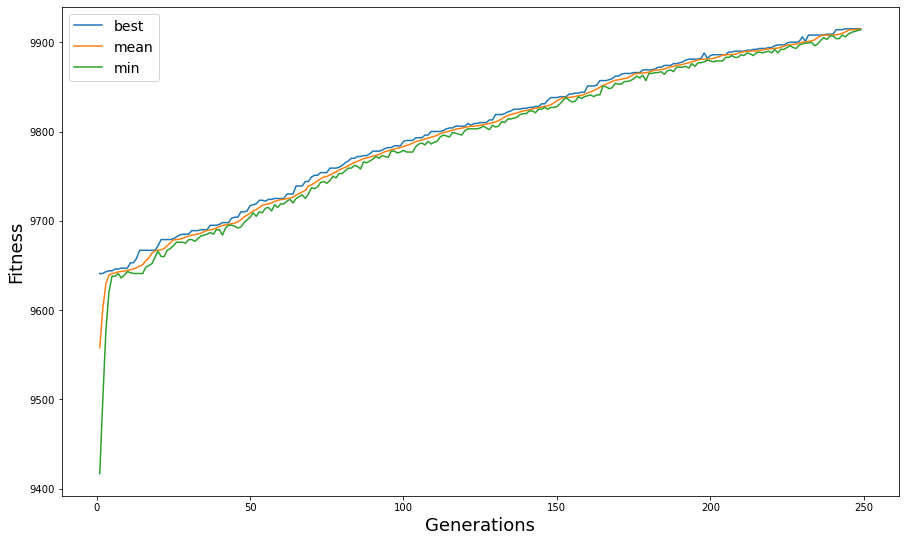

In [5]:
plt.figure(figsize=(15,9))
plt.plot(x_vals, max_vals,label = 'best')
plt.plot(x_vals, mean_vals,label = 'mean')
plt.plot(x_vals, min_vals,label = 'min')
plt.legend(loc = 'upper left', prop=dict(size=14))
plt.xlabel('Generations', fontsize = 18)
plt.ylabel('Fitness', fontsize = 18)
plt.show()


/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance distributions before and after evolution')

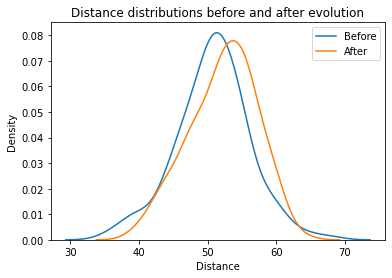

In [6]:
best_fitness_after = max(fits)
best_ind_after = [ind for ind in pop if ind.fitness.values[0] == best_fitness_after][0]
distances_after = distance_lst(best_ind_after)

fig, ax = plt.subplots()
sns.distplot(distances_before, ax=ax, hist=False, label='Before')
sns.distplot(distances_after, ax=ax, hist=False, label='After')
plt.legend()
plt.xlabel('Distance')
plt.title('Distance distributions before and after evolution')

# Part 2

In [7]:
def lst_to_str(lst):
    return ''.join([str(num) for num in lst])

def eval_distance(i):
    ind_str = lst_to_str(i)
    distance_dict = {}
    binary_pairs = []
    for ref_ind in reference:
        distance_dict[(ref_ind, ind_str)] = count_diff(ref_ind, ind_str)
    count = 0
    for k, v in distance_dict.items():
        if v <= 50:
            count += 1
    return count,

def distance_hash(i):
    ind_str = lst_to_str(i)
    distance_dict = {}
    binary_pairs = []
    for ref_ind in reference:
        distance_dict[(ref_ind, ind_str)] = count_diff(ref_ind, ind_str)
    return distance_dict.values()

CXPB = 0.8
MUTPB = 0.3 
reference = best_ind_after

creator.create('FitnessMax', base.Fitness, weights = (1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('evaluate', eval_distance)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.3)
toolbox.register('select', tools.selTournament, tournsize = 3)



/Users/owner/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/owner/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [8]:
pop = toolbox.population(200)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

fits=[ind.fitness.values[0] for ind in pop]

In [9]:
fits_before = fits
best_before = [ind for ind in pop if ind.fitness.values[0] == max(fits_before)]
  
distances_before = distance_hash(best_before[0])
distances_before

dict_values([56, 50, 50, 47, 56, 48, 52, 48, 62, 45, 54, 47, 46, 49, 54, 48, 48, 48, 43, 40])

# Evolution

In [10]:
max_vals = []
mean_vals = []
min_vals = []
x_vals = []
i = 0
while max(fits) < 20 and i < 300:
    i += 1
    x_vals.append(i)
    print('Generation %i --' %i)
    pop2 = toolbox.select(pop, len(pop))
    pop2 = list(map(toolbox.clone, pop2))
    
    for child1, child2 in zip(pop2[::2], pop2[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in pop2:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in pop2 if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    pop[:] = pop2
    
    fits=[ind.fitness.values[0] for ind in pop]
    
    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2 / length - mean**2)**0.5
    mean_vals.append(mean)
    max_vals.append(max(fits))
    min_vals.append(min(fits))
    print("  Min %s" % min(fits))
    print("  Max %s" % max(fits))
    print("  Avg %s" % mean)
    print("  Std %s" % std)

Generation 1 --
  Min 7.0
  Max 15.0
  Avg 11.11
  Std 1.4723790272888306
Generation 2 --
  Min 6.0
  Max 15.0
  Avg 11.375
  Std 1.5666445033893295
Generation 3 --
  Min 8.0
  Max 15.0
  Avg 11.84
  Std 1.4228141129465979
Generation 4 --
  Min 8.0
  Max 16.0
  Avg 11.63
  Std 1.610310529059524
Generation 5 --
  Min 6.0
  Max 17.0
  Avg 12.08
  Std 1.6011246047700374
Generation 6 --
  Min 7.0
  Max 17.0
  Avg 12.015
  Std 1.6415769857061207
Generation 7 --
  Min 8.0
  Max 16.0
  Avg 12.175
  Std 1.6169029037020113
Generation 8 --
  Min 8.0
  Max 17.0
  Avg 12.2
  Std 1.6278820596099812
Generation 9 --
  Min 8.0
  Max 16.0
  Avg 12.355
  Std 1.6938048884095174
Generation 10 --
  Min 8.0
  Max 16.0
  Avg 12.37
  Std 1.7785106128443582
Generation 11 --
  Min 9.0
  Max 16.0
  Avg 12.54
  Std 1.6668533228811806
Generation 12 --
  Min 9.0
  Max 16.0
  Avg 12.395
  Std 1.7403950700918462
Generation 13 --
  Min 8.0
  Max 17.0
  Avg 12.655
  Std 1.8509389509111298
Generation 14 --
  Min 8.0
  M

  Min 9.0
  Max 19.0
  Avg 17.065
  Std 3.0595383638712446
Generation 111 --
  Min 9.0
  Max 19.0
  Avg 17.155
  Std 3.0018286093646274
Generation 112 --
  Min 8.0
  Max 19.0
  Avg 16.55
  Std 3.4172357249683483
Generation 113 --
  Min 8.0
  Max 19.0
  Avg 16.58
  Std 3.3990586932267024
Generation 114 --
  Min 9.0
  Max 19.0
  Avg 16.635
  Std 3.366270191175975
Generation 115 --
  Min 9.0
  Max 19.0
  Avg 16.745
  Std 3.1796186878303447
Generation 116 --
  Min 9.0
  Max 19.0
  Avg 17.13
  Std 3.0988868969357433
Generation 117 --
  Min 8.0
  Max 19.0
  Avg 16.845
  Std 3.184489755047114
Generation 118 --
  Min 8.0
  Max 19.0
  Avg 16.705
  Std 3.3223448045017956
Generation 119 --
  Min 9.0
  Max 19.0
  Avg 16.39
  Std 3.2905774569214965
Generation 120 --
  Min 10.0
  Max 19.0
  Avg 16.29
  Std 3.2489844567187554
Generation 121 --
  Min 9.0
  Max 19.0
  Avg 16.62
  Std 3.2412343327812567
Generation 122 --
  Min 8.0
  Max 19.0
  Avg 16.45
  Std 3.4157722406507167
Generation 123 --
  Min 1

  Min 8.0
  Max 19.0
  Avg 16.645
  Std 3.319484146670987
Generation 219 --
  Min 10.0
  Max 19.0
  Avg 16.9
  Std 3.0248966924508403
Generation 220 --
  Min 6.0
  Max 19.0
  Avg 17.04
  Std 3.0411182153938148
Generation 221 --
  Min 8.0
  Max 19.0
  Avg 16.99
  Std 3.1336719675167144
Generation 222 --
  Min 9.0
  Max 19.0
  Avg 17.075
  Std 3.041278514046361
Generation 223 --
  Min 9.0
  Max 19.0
  Avg 16.48
  Std 3.325597690641487
Generation 224 --
  Min 9.0
  Max 19.0
  Avg 16.735
  Std 3.210105138465095
Generation 225 --
  Min 9.0
  Max 19.0
  Avg 16.61
  Std 3.2996818028409955
Generation 226 --
  Min 9.0
  Max 19.0
  Avg 16.655
  Std 3.2382055215813494
Generation 227 --
  Min 9.0
  Max 19.0
  Avg 16.34
  Std 3.381478966369603
Generation 228 --
  Min 9.0
  Max 19.0
  Avg 16.575
  Std 3.2945978510282563
Generation 229 --
  Min 9.0
  Max 19.0
  Avg 16.45
  Std 3.414308129035812
Generation 230 --
  Min 10.0
  Max 19.0
  Avg 16.85
  Std 3.0228298000383567
Generation 231 --
  Min 9.0
  

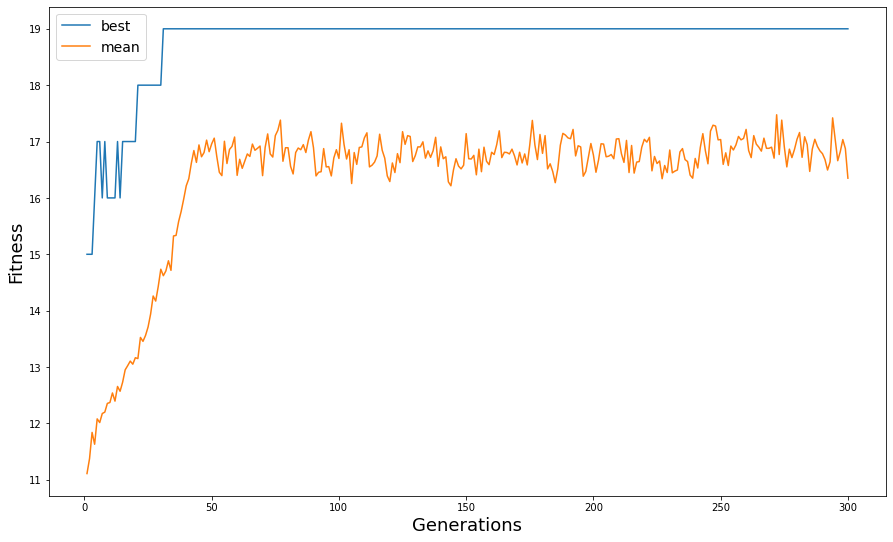

In [11]:
plt.figure(figsize=(15,9))
plt.plot(x_vals, max_vals,label = 'best')
plt.plot(x_vals, mean_vals,label = 'mean')
plt.legend(loc = 'upper left', prop = dict(size = 14))
plt.xlabel('Generations', fontsize = 18)
plt.ylabel('Fitness', fontsize = 18)
plt.show()

In [12]:
best_after = [ind for ind in pop if ind.fitness.values[0] == max(fits)]
(distance_hash(best_after[0]))

dict_values([56, 50, 46, 49, 46, 48, 46, 42, 48, 49, 46, 47, 48, 45, 48, 46, 48, 50, 47, 48])